# study the impact of the news

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import thulac
import string
from gensim import corpora
from pyhanlp import *
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

## load news data of 002230.SZ

In [10]:
symbol = '002230.SZ'

In [7]:
news = pd.read_csv('../news/%s.csv' % symbol)[['date','title','content']]
news['content'] = news['title'] + news['content']
news = news.dropna().drop('title',axis=1)
news = news.sort_values('date')
is_useful = np.array([not bool(re.search('融资融券信息',l)) for l in news['content'].values])
is_useful = is_useful & np.array([not bool(re.search('大宗交易数据',l)) for l in news['content'].values])
is_useful = is_useful & np.array([not bool(re.search('今日超大单流',l)) for l in news['content'].values])
news = news[is_useful]
news['date'] = list(map(lambda x: int(x.replace('-','')), news['date'].values))
news['content'] = [l+' ' for l in news['content'].values]
news = news.groupby('date').sum().reset_index()
news['content'] = [re.sub('\d+|[a-z]+|[A-Z]+', '0',s) for s in news['content'].values]
news

date                                            content
0    20110714  科大讯飞与安徽移动战略合作　　0月0日，中国移动通信集团安徽有限公司与科大讯飞签署战略合作框...
1    20110719  科大讯飞上半年净利0万 增长0%　　证券时报记者获悉，科大讯飞(0)0月0日公布0年半年报，...
2    20110803  科大讯飞拟授0万份股票期权  　　科大讯飞(0)周三晚间公告股票期权激励计划(草案)，拟向0...
3    20110804  科大讯飞新推股权激励计划　　安徽科大讯飞信息科技股份有限公司(科大讯飞，0)昨日发布股权激励...
4    20110805  科大讯飞推出股权激励  　　科大讯飞(0)公告称，公司拟向0名激励对象授予0万份股票期权，对...
5    20111011  苹果新品力推语音识别 科大讯飞收获利好　　不是投影键盘，也不是0移动支付，国庆长假中揭开面纱...
6    20111014  热点追踪：科大讯飞 热炒苹果语音概念　　热点：00000力推语音控制，科大讯飞(0)被热炒。...
7    20111018  科大讯飞全年业绩预增0%-0%　　科大讯飞0月0日晚间公告，预计0年度归属于上市公司股东的净...
8    20111019  前三季净利润增长0% 基金三季度抛弃科大讯飞　　与苹果00的热卖以及公司股价节后的0连阳相比...
9    20111201  联想减持科大讯飞 三公司股东套现0.0亿元　　0月以来，0股市场震荡下行，沪综指月度跌幅为0...
10   20111202  联想减持科大讯飞　　昨日，科大讯飞 (0)发布公告称，0月0日遭到股东联想投资减持，与此同时...
11   20120117  科大讯飞股权激励登记完成 行权价高出市价三成　　0年0月，0股语音技术厂商科大讯飞 (0，收...
12   20120217  科大讯飞一项目获国家科学技术进步二等奖　　科大讯飞(0)0月0日晚间公告，公司近日收到由国务...
13   20120227  科大讯飞拟投0万合办安徽工大机电学院　　科大讯飞(0)0月0日晚间公告称，公司拟出资0万元与...
14   20120314  科大讯飞与联通合作开拓智能语音业务　　科大讯飞(0)0月0日晚间公告，公司今日与中国联合网络...
15   20120315  科大讯飞牵手中国联通推展智能语音应用领域　　科大讯飞今日公告称，公司与中国联通于0月0日签订...
16   20120319  持股过低董事席位将难保 联想减持科大讯飞或暂歇　　0年底，科大讯飞(0)发布公告称，公司第二...
17   20120324  柳传志力撑科大讯飞 不敌机构出逃　　0月0日下午，科大讯飞 (0.0)在北京召开新一代“语音...
18   20120405  科大讯飞公布分配预案 拟0转0派0.0元　　科大讯飞(0)0月0日晚间发布0年度利润分配预案...
19   20120409  科大讯飞一季度净利0万 增0%　　科大讯飞(0)0月0日晚间发布0年第一季度报告。 　　公司...
20   20120509                  科大讯飞限售股解禁数据一览(0/0)　　解禁日期 0-0-0   
21   20120513  科大讯飞拟0转0派0.0元 0日股权登记　　科大讯飞(0)0月0日晚间公告称，公司0年度权益...
22   20120606  科大讯飞控制权或生变　　科大讯飞 (0)公告，公司股东上海广信科技发展有限公司于0年0月0日...
23   20120703  科大讯飞龙虎榜数据一览(0/0)　　 　　类型：当日涨幅偏离值达0%的证券 　　收盘价：0....
24   20120709  科大讯飞“点射”苹果遭回击　　科大讯飞(0)给苹果公司抛出了一道棘手的难题。 　　在超过应用...
25   20120711  科大讯飞智能语音技术进入警用市场　　近日，由安徽省公安厅、公安部物证鉴定中心、科大讯飞 (0...
26   20120712  科大讯飞难啃苹果 申请上架0000再遭拒  　　对于推出了一款和苹果00有直接竞争关系的中文...
27   20120816  布局移动互联网 中国移动战略投资科大讯飞　　除了计划成立“互联网公司”之外，中国移动还计划采...
28   20120817  科大讯飞确定“引援”中国移动　　科大讯飞和中国移动昨日午间分别在深交所和港交所发布重要事项公...
29   20120818  科大讯飞控制人团队一成员“离队”　　科大讯飞0年初创时即入股的元老孙金城，在今年0月0日离职...
..        ...                                                ...
559  20190418  科大讯飞去年净利润0.0亿 获政府补贴0.0亿　　0月0日，科大讯飞公布0年全年财报以及0年...
560  20190419  科大讯飞今年第一季度营收达0.0亿元 同比增长0.0%　　【0000】0月0日消息，深交所上...
561  20190420  科大讯飞去年净利0.0亿元 同比增长0% 董事长刘庆峰年薪为0万元　　0月0日消息，科大讯飞...
562  20190421  0科大讯飞年报解读：净利增逾两成、消费者营收翻番　　 0月0日，科大讯飞发布了0年财报。财报...
563  20190422  0岁科大讯飞步入0.0时代： “三驾马车”驱动业绩快速增长　　作为中国人工智能产业先行者，科...
564  20190423  科大讯飞：持续推进“平台 赛道”战略 业务良性发展　　国盛证券发布科大讯飞的研报指出，持续推...
565  20190424  科大讯飞：与四川省政府签署战略合作框架协议　　0月0日，四川省政府与科大讯飞股份有限公司签署...
566  20190425  科大讯飞：在人工智能领域的研发投入为可持续发展打下基础　　科大讯飞(0)0年度网上业绩说明会...
567  20190506  科大讯飞0月0日发生0笔大宗交易 成交0.0万元   0年0月0日，科大讯飞发生了0笔大宗交...
568  20190510  科大讯飞：人机耦合赋能媒体行业提质增效是不可逆转的趋势  　　0全球人工智能产品应用博览会期...
569  20190515  科大讯飞股份有限公司关于限制性股票激励计划首次授予第一个解除限售期解除限售股份上市流通的提示...
570  20190516  科大讯飞副总裁李世鹏：语音领域讯飞没有对手  　　国内首批上市的人工智能企业队伍中，科大讯飞...
571  20190517  科大讯飞周佳峰：人工智能已进入规模化应用红利期　　“人工智能已经从技术探索期，进入到了人工智...
572  20190520  科大讯飞将于0月0日下午召开“科大讯飞0新品发布会”  　　科大讯飞(0.0)公布，公司定于...
573  20190521  科大讯飞发布三款办公产品  　　0日，科大讯飞0新品发布会，发布三款办公产品。首先是讯飞转写...
574  20190523  兑现0技术价值 科大讯飞发布新品展现0端布局　　人工智能已经历了0多年的发展，0年人工智能从...
575  20190524  科大讯飞与光大银行签署战略合作协议  　　0月0日，科大讯飞与光大银行在合肥科大讯飞总部签署...
576  20190525  兑现0应用红利 科大讯飞抢攻消费端　　从技术创新到公共领域应用，0明星企业科大讯飞(0.0)...
577  20190529  乐森机器人获0亿元0轮融资 科大讯飞联席0跟投  　　智能变形机器人品牌「乐森机器人」完成0...
578  20190605  科大讯飞携手腾讯音乐娱乐集团 00为业界提供全新音乐服务解决方案  　　科大讯飞(0)宣布与...
579  20190611  0 00 0来了！科大讯飞今年带来了什么？　　0月0日-0日，第五届0 00(亚洲消费电子展...
580  20190613  科大讯飞刘庆峰谈未来0年0三大趋势　   　0年，在人工智能第二次浪潮的寒冬期，中国科学技术...
581  20190619  科大讯飞发力人工智能消费产品效果如何？0大促数据来了　　 今年0月份一口气发布了0款硬件产品...
582  20190620  科大讯飞：预计净利润端弹性将有望在0年00开始显现  　　中信证券发布科大讯飞的研报指出，随...
583  20190624  科大讯飞对市值的信心来自何处  　　此前，科大讯飞董事长刘庆峰在年度说明会表示：“讯飞的目标...
584  20190625  科大讯飞：重视技术研发和产业布局有利于投资者长期回报  　　市场短期不一定能反映公司的内在价...
585  20190626  科大讯飞000+000 双轮驱动 引领0消费品细分场景新趋势  　　现如今，人工智能之于0端...
586  20190627  科大讯飞刘庆峰：00时代语音交互将成主导触摸成辅助　　0月0日，在中国移动“千兆引领生态赋能...
587  20190701  0最聪明0公司 科大讯飞：中英翻译识别率超0%  　　0月0日，《麻省理工科技评论》(下称“...
588  20190709  科大讯飞：00已经最新上线了“生活垃圾分类查询”技能  　

### clean the text

In [8]:
punctuation = '"#$&\'()*+,-/:;<=>@[\\]^_`{|}~.!?＂＃＄＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣〃〈〉《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏﹑﹔·！？｡。'

news['title'] = [s.translate(str.maketrans('','',punctuation)) for s in news['content'].values]
news['title'] = [thu1.cut(s, text=True) for s in news['content'].values]

news

FileNotFoundError: [Errno 2] No such file or directory: 'company_name.csv'

## load price data

In [7]:
index_all = pd.read_csv('../../data/wind/aindexeodprices.csv')
index = index_all[index_all['S_INFO_WINDCODE']=='000906.SH'].loc[:,['TRADE_DT','S_DQ_CLOSE']].sort_values('TRADE_DT')
index.columns = ['date', 'idxclose']
index['idxpast10'] = index['idxclose'] / index['idxclose'].shift(10).values - 1
index['idxpast5'] = index['idxclose'] / index['idxclose'].shift(5).values - 1
index['idxfuture5'] = index['idxclose'].shift(-5).values / index['idxclose'] - 1
index['idxfuture10'] = index['idxclose'].shift(-10).values / index['idxclose'] - 1
index

date   idxclose  idxpast10  idxpast5  idxfuture5  idxfuture10
219164    20050104   983.8950        NaN       NaN    0.016468    -0.004834
219165    20050105   995.5760        NaN       NaN    0.004358    -0.023310
219166    20050106   986.2160        NaN       NaN    0.015225    -0.025976
219167    20050107   987.6930        NaN       NaN    0.003762    -0.003852
219168    20050110   997.1860        NaN       NaN   -0.027341     0.003527
219169    20050111  1000.0980        NaN  0.016468   -0.020957    -0.002097
219170    20050112   999.9150        NaN  0.004358   -0.027548    -0.010855
219171    20050113  1001.2310        NaN  0.015225   -0.040583    -0.027763
219172    20050114   991.4090        NaN  0.003762   -0.007586    -0.027620
219173    20050117   969.9220        NaN -0.027341    0.031736    -0.025451
219174    20050118   979.1390  -0.004834 -0.020957    0.019264    -0.036664
215849    20050119   972.3690  -0.023310 -0.027548    0.017166     0.022464
215850    20050120   960.5980  -0.025976 -0.040583    0.013363     0.019199
215851    20050121   983.8880  -0.003852 -0.007586   -0.020187     0.017164
215852    20050124  1000.7030   0.003527  0.031736   -0.055427     0.007863
215853    20050125   998.0010  -0.002097  0.019264   -0.054871     0.009830
215854    20050126   989.0610  -0.010855  0.017166    0.005208     0.004830
215855    20050127   973.4340  -0.027763  0.013363    0.005760     0.040376
215856    20050128   964.0260  -0.027620 -0.020187    0.038120     0.073883
215857    20050131   945.2370  -0.025451 -0.055427    0.067004     0.096769
215858    20050201   943.2400  -0.036664 -0.054871    0.068457     0.101725
215859    20050202   994.2120   0.022464  0.005208   -0.000376     0.046117
215860    20050203   979.0410   0.019199  0.005760    0.034417     0.056375
215861    20050204  1000.7750   0.017164  0.038120    0.034449     0.030683
215862    20050216  1008.5720   0.007863  0.067004    0.027896     0.007961
215863    20050217  1007.8110   0.009830  0.068457    0.031137     0.014765
215864    20050218   993.8380   0.004830 -0.000376    0.046511     0.023803
215865    20050221  1012.7370   0.040376  0.034417    0.021227     0.010141
215866    20050222  1035.2510   0.073883  0.034449   -0.003641     0.007579
215867    20050223  1036.7070   0.096769  0.027896   -0.019394     0.005397
...            ...        ...        ...       ...         ...          ...
11588827  20190513  3885.7205  -0.096798  0.001371   -0.014499    -0.008591
11643592  20190514  3859.2363  -0.078911 -0.015867    0.006648     0.005163
11631600  20190515  3945.8635  -0.046475  0.018588   -0.020582    -0.018542
11616839  20190516  3965.3701  -0.037654  0.041253   -0.043541    -0.029415
11636620  20190517  3857.8478  -0.067863 -0.022411   -0.016315    -0.005436
11645366  20190520  3829.3795  -0.013149 -0.014499    0.005996    -0.000408
11651539  20190521  3884.8934  -0.009325  0.006648   -0.001476    -0.024443
11667986  20190522  3864.6506  -0.002376 -0.020582    0.002082    -0.020176
11653874  20190523  3792.7150  -0.004084 -0.043541    0.014769    -0.013635
11661259  20190524  3794.9079  -0.038360 -0.016315    0.011059    -0.002153
11650567  20190527  3852.3401  -0.008591  0.005996   -0.006365     0.014171
11685589  20190528  3879.1603   0.005163 -0.001476   -0.023001    -0.000512
11698279  20190529  3872.6977  -0.018542  0.002082   -0.022212     0.000652
11702529  20190530  3848.7301  -0.029415  0.014769   -0.027991    -0.003475
11706095  20190531  3836.8755  -0.005436  0.011059   -0.013067    -0.000045
11716464  20190603  3827.8190  -0.000408 -0.006365    0.020668     0.004710
11725493  20190604  3789.9346  -0.024443 -0.023001    0.023018     0.028050
11744565  20190605  3786.6787  -0.020176 -0.022212    0.023383     0.057521
11756197  20190606  3741.0013  -0.013635 -0.027991    0.025222     0.074982
11742590  20190610  3786.7391  -0.002153 -0.013067    0.013194     0.063691
11734143  20190611  3906.9320   0.014171  0.020668   -0.015635

In [8]:
price_all = pd.read_csv('../../data/wind/ashareeodprices.csv')

In [9]:
price = price_all[price_all['S_INFO_WINDCODE']==symbol]
price = price.sort_values('TRADE_DT').loc[:,['TRADE_DT','S_DQ_ADJCLOSE']]
price.columns = ['date', 'close']
price['past10'] = price['close'] / price['close'].shift(10).values - 1
price['past5'] = price['close'] / price['close'].shift(5).values - 1
price['future5'] = price['close'].shift(-5).values / price['close'] - 1
price['future10'] = price['close'].shift(-10).values / price['close'] - 1
price

date   close    past10     past5   future5  future10
3333766   20080512   30.31       NaN       NaN  0.196305  0.193665
3336103   20080513   33.34       NaN       NaN  0.094781  0.034793
3343917   20080514   33.95       NaN       NaN  0.085420  0.030928
3343194   20080515   34.00       NaN       NaN  0.049412  0.064412
3336278   20080516   32.96       NaN       NaN  0.134709  0.113167
3339530   20080519   36.26       NaN  0.196305 -0.002206  0.000000
3342578   20080520   36.50       NaN  0.094781 -0.054795  0.059726
3335656   20080521   36.85       NaN  0.085420 -0.050204  0.038263
3338213   20080522   35.68       NaN  0.049412  0.014294  0.079036
3356591   20080523   37.40       NaN  0.134709 -0.018984  0.037433
3368177   20080526   36.18  0.193665 -0.002206  0.002211  0.019348
3353694   20080527   34.50  0.034793 -0.054795  0.121159  0.040580
3370539   20080528   35.00  0.030928 -0.050204  0.093143  0.017143
3361662   20080529   36.19  0.064412  0.014294  0.063830 -0.088422
3366905   20080530   36.69  0.113167 -0.018984  0.057509 -0.122377
3356136   20080602   36.26  0.000000  0.002211  0.017099 -0.164368
3364763   20080603   38.68  0.059726  0.121159 -0.071872 -0.175543
3367062   20080604   38.26  0.038263  0.093143 -0.069524 -0.226869
3349536   20080605   38.50  0.079036  0.063830 -0.143117 -0.211948
3366432   20080606   38.80  0.037433  0.057509 -0.170103 -0.230670
3361268   20080610   36.88  0.019348  0.017099 -0.178416 -0.148590
3367320   20080611   35.90  0.040580 -0.071872 -0.111699 -0.114206
3357907   20080612   35.60  0.017143 -0.069524 -0.169101 -0.123596
3355742   20080613   32.99 -0.088422 -0.143117 -0.080327 -0.108215
3349883   20080616   32.20 -0.122377 -0.170103 -0.072981 -0.065528
3380514   20080617   30.30 -0.164368 -0.178416  0.036304 -0.009901
3389086   20080618   31.89 -0.175543 -0.111699 -0.002822 -0.041706
3378390   20080619   29.58 -0.226869 -0.169101  0.054767  0.068289
3388371   20080620   30.34 -0.211948 -0.080327 -0.030323  0.007910
3394439   20080623   29.85 -0.230670 -0.072981  0.008040  0.045561
...            ...     ...       ...       ...       ...       ...
10059807  20190508  394.77 -0.157716 -0.106410  0.013907  0.066824
10060878  20190509  391.42 -0.142319 -0.089424  0.057151  0.000358
10057026  20190510  408.70 -0.099978 -0.055400 -0.022608 -0.055371
10052177  20190513  399.59 -0.146467  0.026116  0.015090 -0.006357
10070359  20190514  396.91 -0.111263  0.009512  0.072208  0.000680
10063142  20190515  400.26 -0.093983  0.013907  0.052191 -0.014391
10066395  20190516  413.79 -0.037384  0.057151 -0.053723 -0.064405
10074035  20190517  399.46 -0.076756 -0.022608 -0.033520 -0.025134
10072750  20190520  405.62  0.041600  0.015090 -0.021128 -0.037301
10072971  20190521  425.57  0.082407  0.072208 -0.066711 -0.093146
10065761  20190522  421.15  0.066824  0.052191 -0.063279 -0.073442
10090311  20190523  391.56  0.000358 -0.053723 -0.011288 -0.039330
10107498  20190524  386.07 -0.055371 -0.033520  0.008677 -0.007978
10087556  20190527  397.05 -0.006357 -0.021128 -0.016522 -0.002367
10103224  20190528  397.18  0.000680 -0.066711 -0.028325 -0.016844
10099003  20190529  394.50 -0.014391 -0.063279 -0.010849 -0.000659
10093766  20190530  387.14 -0.064405 -0.011288 -0.028362 -0.009686
10108855  20190531  389.42 -0.025134  0.008677 -0.016512 -0.002773
10127270  20190603  390.49 -0.037301 -0.016522  0.014392  0.049041
10132799  20190604  385.93 -0.093146 -0.028325  0.011816  0.078071
10121524  20190605  390.22 -0.073442 -0.010849  0.010302       NaN
10132698  20190606  376.16 -0.039330 -0.028362  0.019221       NaN
10111449  20190610  382.99 -0.007978 -0.016512  0.013969       NaN
10120569  20190611  396.11 -0.002367  0.014392  0.034157       NaN
10154440  20190612  390.49 -0.016844  0.011816  0.065482       NaN
10135772  20190613  394.24 -0.000659  0.010302       NaN       NaN
10154732  20190614  383.39 -0.009686  0.019221       NaN       NaN
10151619  20190617  388.34 -0.002773  0.013969       NaN     

In [10]:
df_p = price.merge(index,on=['date'])
df_p['expast10'] = df_p['past10'] - df_p['idxpast10']
df_p['expast5'] = df_p['past5'] - df_p['idxpast5']
df_p['exfuture5'] = df_p['future5'] - df_p['idxfuture5']
df_p['exfuture10'] = df_p['future10'] - df_p['idxfuture10']
df_p

date   close    past10     past5   future5  future10   idxclose  \
0     20080512   30.31       NaN       NaN  0.196305  0.193665  3901.4510   
1     20080513   33.34       NaN       NaN  0.094781  0.034793  3862.3330   
2     20080514   33.95       NaN       NaN  0.085420  0.030928  3977.7520   
3     20080515   34.00       NaN       NaN  0.049412  0.064412  3948.2760   
4     20080516   32.96       NaN       NaN  0.134709  0.113167  3926.2060   
5     20080519   36.26       NaN  0.196305 -0.002206  0.000000  3908.7330   
6     20080520   36.50       NaN  0.094781 -0.054795  0.059726  3696.1010   
7     20080521   36.85       NaN  0.085420 -0.050204  0.038263  3772.4880   
8     20080522   35.68       NaN  0.049412  0.014294  0.079036  3709.0130   
9     20080523   37.40       NaN  0.134709 -0.018984  0.037433  3671.8680   
10    20080526   36.18  0.193665 -0.002206  0.002211  0.019348  3560.3340   
11    20080527   34.50  0.034793 -0.054795  0.121159  0.040580  3576.6730   
12    20080528   35.00  0.030928 -0.050204  0.093143  0.017143  3676.5050   
13    20080529   36.19  0.064412  0.014294  0.063830 -0.088422  3581.5130   
14    20080530   36.69  0.113167 -0.018984  0.057509 -0.122377  3606.4960   
15    20080602   36.26  0.000000  0.002211  0.017099 -0.164368  3624.7280   
16    20080603   38.68  0.059726  0.121159 -0.071872 -0.175543  3611.9800   
17    20080604   38.26  0.038263  0.093143 -0.069524 -0.226869  3545.4910   
18    20080605   38.50  0.079036  0.063830 -0.143117 -0.211948  3508.5150   
19    20080606   38.80  0.037433  0.057509 -0.170103 -0.230670  3485.0430   
20    20080610   36.88  0.019348  0.017099 -0.178416 -0.148590  3197.5540   
21    20080611   35.90  0.040580 -0.071872 -0.111699 -0.114206  3127.7270   
22    20080612   35.60  0.017143 -0.069524 -0.169101 -0.123596  3078.2750   
23    20080613   32.99 -0.088422 -0.143117 -0.080327 -0.108215  2963.7040   
24    20080616   32.20 -0.122377 -0.170103 -0.072981 -0.065528  2928.3930   
25    20080617   30.30 -0.164368 -0.178416  0.036304 -0.009901  2803.3350   
26    20080618   31.89 -0.175543 -0.111699 -0.002822 -0.041706  2953.0310   
27    20080619   29.58 -0.226869 -0.169101  0.054767  0.068289  2730.3580   
28    20080620   30.34 -0.211948 -0.080327 -0.030323  0.007910  2802.9320   
29    20080623   29.85 -0.230670 -0.072981  0.008040  0.045561  2746.6900   
...        ...     ...       ...       ...       ...       ...        ...   
2673  20190508  394.77 -0.157716 -0.106410  0.013907  0.066824  3873.8553   
2674  20190509  391.42 -0.142319 -0.089424  0.057151  0.000358  3808.2672   
2675  20190510  408.70 -0.099978 -0.055400 -0.022608 -0.055371  3946.2863   
2676  20190513  399.59 -0.146467  0.026116  0.015090 -0.006357  3885.7205   
2677  20190514  396.91 -0.111263  0.009512  0.072208  0.000680  3859.2363   
2678  20190515  400.26 -0.093983  0.013907  0.052191 -0.014391  3945.8635   
2679  20190516  413.79 -0.037384  0.057151 -0.053723 -0.064405  3965.3701   
2680  20190517  399.46 -0.076756 -0.022608 -0.033520 -0.025134  3857.8478   
2681  20190520  405.62  0.041600  0.015090 -0.021128 -0.037301  3829.3795   
2682  20190521  425.57  0.082407  0.072208 -0.066711 -0.093146  3884.8934   
2683  20190522  421.15  0.066824  0.052191 -0.063279 -0.073442  3864.6506   
2684  20190523  391.56  0.000358 -0.053723 -0.011288 -0.039330  3792.7150   
2685  20190524  386.07 -0.055371 -0.033520  0.008677 -0.007978  3794.9079   
2686  20190527  397.05 -0.006357 -0.021128 -0.016522 -0.002367  3852.3401   
2687  20190528  397.18  0.000680 -0.066711 -0.028325 -0.016844  3879.1603   
2688  20190529  394.50 -0.014391 -0.063279 -0.010849 -0.000659  3872.6977   
2689  20190530  387.14 -0.064405 -0.011288 -0.028362 -0.009686  3848.7301   
2690  20190531  389.42 -0.025134  0.008677 -0.016512 -0.002773  3836.8755   
2691  20190603  390.49 -0.037301 -0.016522  0.014392  0.049041  3827.8190   
2692  20190604  385.93 -0.093146 -0.028325  0.011816  0.078071  3789.9346   
2693  

## merger news data and price data

In [42]:
df = news[['date','title']].merge(df_p[['date','expast10','expast5','exfuture5','exfuture10']],on=['date'])
df.style.bar(subset=['expast10','expast5','exfuture5','exfuture10'],align='zero',color=['#5fba7d','#d65f5f'])

In [43]:
df.sort_values('exfuture5',ascending=False).style.bar(subset=['expast10','expast5','exfuture5','exfuture10'],align='zero',color=['#5fba7d','#d65f5f'])

In [44]:
df.to_csv('../data/%s.csv' % symbol,quoting=1)

In [45]:
pos_text = df[df['exfuture5']>0.01]['title'].sum()
keys = list(set(pos_text.split()))
posdict = dict(zip(keys, np.zeros(len(keys),dtype=int)))
for w in pos_text.split():
    posdict[w] += 1
posdict = pd.DataFrame({'word':list(posdict.keys()), 'freq':list(posdict.values())})
posdict = posdict.sort_values('freq',ascending=False)
posdict[posdict['freq']>1]

word  freq
191       大讯   203
638     科大讯飞   110
1183       科   102
487       0日    68
851      飞0月    55
276        %    39
627        与    37
459        的    33
1035      飞0    32
562        元    31
703        股    28
411       公司    28
984       合作    28
1306      智能    27
608       语音    25
502       战略    25
105       盘中    24
930       达0    24
289       技术    22
59       董事长    21
405        家    20
9         增持    20
496        年    19
1244       在    19
93         0    17
768        不    17
688        飞    17
905        成    17
206       快速    16
817     人工智能    16
...      ...   ...
334        均     2
333       侵占     2
903       引擎     2
1138      推进     2
322     数据00     2
898     下降00     2
887       解禁     2
1260      涉足     2
1180     净利降     2
244       商业     2
1182     浙江省     2
734   二脉科大讯飞     2
252        于     2
731       再次     2
251       出炉     2
1186      调研     2
41        系统     2
246       股东     2
245       飞成     2
40       教育厅     2
1175      股权     2
735       板块     2
812      乐知行     2
1301     飞灵犀     2
736       听会     2
240      上涨科     2
36         手     2
882      增近0     2
811      飞高管     2
239       广播     2

[488 rows x 2 columns]

In [46]:
neg_text = df[df['exfuture5']<-0.01]['title'].sum()
keys = list(set(neg_text.split()))
negdict = dict(zip(keys, np.zeros(len(keys),dtype=int)))
for w in neg_text.split():
    negdict[w] += 1
negdict = pd.DataFrame({'word':list(negdict.keys()), 'freq':list(negdict.values())})
negdict = negdict.sort_values('freq',ascending=False)
negdict[negdict['freq']>1]

word  freq
213       大讯   209
1230       科    99
704     科大讯飞    97
527       0日    66
905      飞0月    58
685        与    47
300        %    41
1078      飞0    33
660       语音    31
608        元    31
1037      合作    30
830        不    29
884     人工智能    29
120       盘中    28
759        股    27
979       达0    26
488        的    26
1357      智能    26
537        年    25
432       公司    21
423        家    20
820       同比    19
1284       在    19
109        0    18
506        同    18
541       战略    18
748        飞    18
312       技术    18
1307      领域    17
133        已    16
...      ...   ...
344   协议科大讯飞     2
127       推出     2
240     集00亿     2
130      非公开     2
54         签     2
52        购买     2
51         袭     2
82        飞步     2
301       分配     2
234     蒸发0亿     2
90         正     2
393      核准科     2
12         牵     2
186      计划科     2
394        及     2
279        于     2
388       股科     2
14       机00     2
164      入00     2
9      成科大讯飞     2
188      飞放量     2
167        斩     2
84       证监会     2
3         法院     2
285       保持     2
172       历史     2
189       正在     2
273       有望     2
2         中报     2
175       公开     2

[467 rows x 2 columns]

In [47]:
stopwords= list(set(posdict.iloc[:30]['word'].values) & set(negdict.iloc[:30]['word'].values))

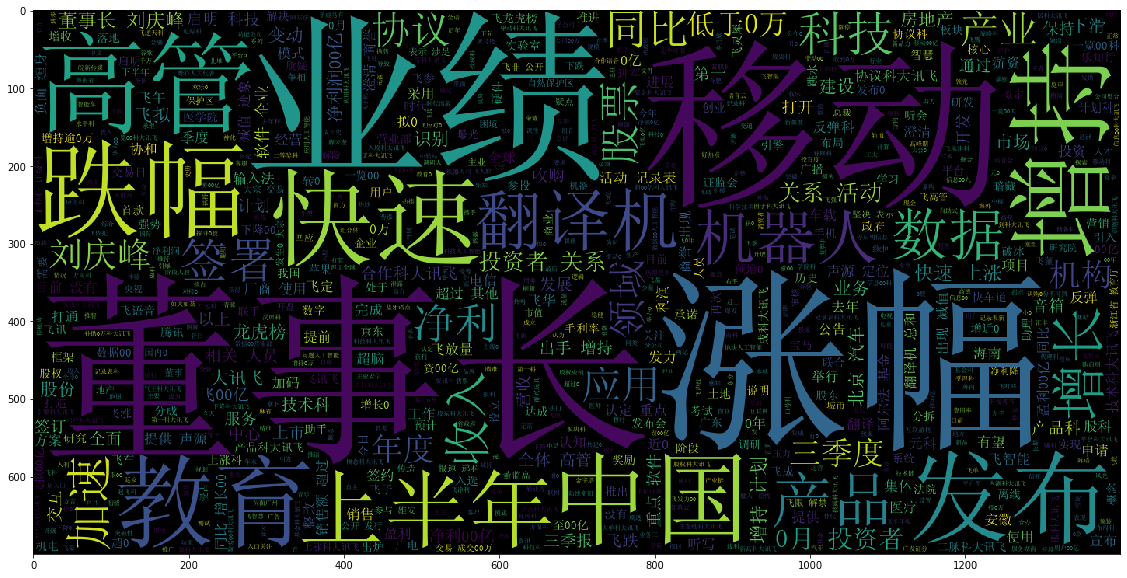

In [48]:
pos_text = df[df['exfuture5']>0.01]['title'].sum()
wc = WordCloud(max_words=800,stopwords=stopwords,font_path='SimSun.ttf',width=1400, height=700, margin=2).generate(pos_text)
plt.figure(figsize=(20,10))
plt.imshow(wc)

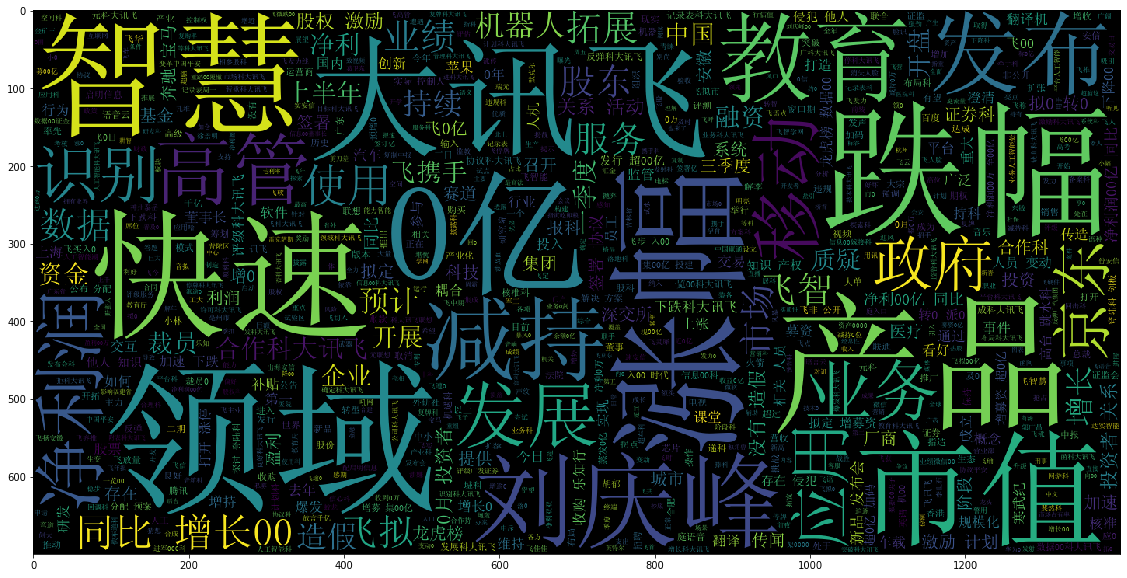

In [53]:
neg_text = df[df['exfuture5']<-0.01]['title'].sum()
wc = WordCloud(max_words=800,stopwords=stopwords,font_path='SimSun.ttf',width=1400, height=700).generate(neg_text)
plt.figure(figsize=(20,10))
plt.imshow(wc)

In [5]:
df = pd.read_csv('../data/002230.SZ.csv')
df.sort_values('exfuture5',ascending=False).style.bar(subset=['expast10','expast5','exfuture5','exfuture10'],align='zero',color=['#5fba7d','#d65f5f'])